In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# 读取CSV文件
df = pd.read_csv('../storage/trace.csv')

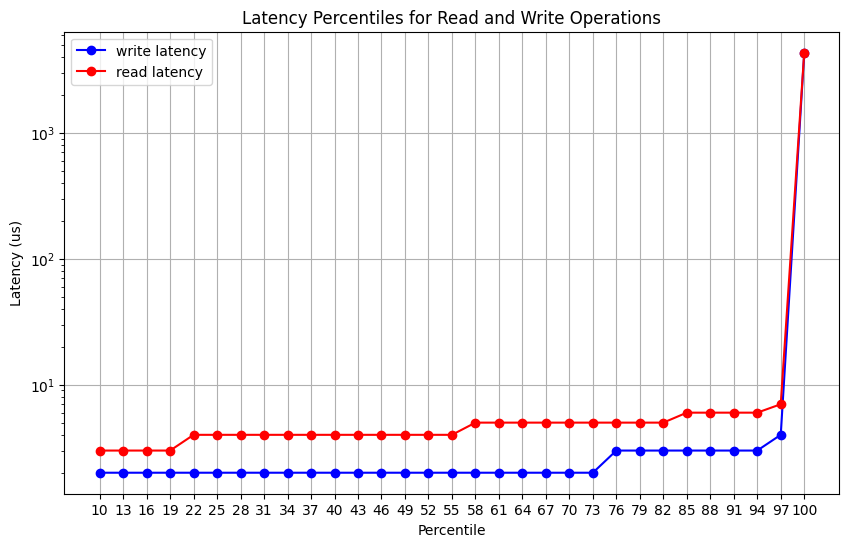

In [18]:
# 数据筛选：分别处理 write 和 read 操作
operations = ['write', 'read']
colors = ['blue', 'red']
percentiles = np.arange(10, 101, 3)  # 定义百分位数，从 10% 到 100%

plt.figure(figsize=(10, 6))

for operation, color in zip(operations, colors):
    operation_df = df[df['operation_type'] == operation]
    # 计算百分位数对应的延迟值
    percentile_durations = np.percentile(operation_df['duration'], percentiles)
    
    # 绘图
    plt.plot(percentiles, percentile_durations, marker='o', label=f'{operation} latency', color=color)

plt.title('Latency Percentiles for Read and Write Operations')
plt.xlabel('Percentile')
plt.ylabel('Latency (us)')
plt.yscale('log')  # 使用对数坐标
plt.grid(True)
plt.legend()
plt.xticks(percentiles)  # 设置 X 轴的刻度为定义的百分位数
plt.show()

In [19]:
# 分别提取write和read的duration数据
write_latency = df[df['operation_type'] == 'write']['duration']
read_latency = df[df['operation_type'] == 'read']['duration']

# 计算write的latency分布
write_percentiles = np.percentile(write_latency, [50, 90, 95, 99, 99.9, 99.99])

# 计算read的latency分布
read_percentiles = np.percentile(read_latency, [50, 90, 95, 99, 99.9, 99.99])


# 打印write和read的latency分布信息
print("Write Latency Distribution:")
print("50%: {:.2f} us".format(write_percentiles[0]))
print("90%: {:.2f} us".format(write_percentiles[1]))
print("95%: {:.2f} us".format(write_percentiles[2]))
print("99%: {:.2f} us".format(write_percentiles[3]))
print("99.9%: {:.2f} us".format(write_percentiles[4]))
print("99.99%: {:.2f} us".format(write_percentiles[5]))

print("\nRead Latency Distribution:")
print("50%: {:.2f} us".format(read_percentiles[0]))
print("90%: {:.2f} us".format(read_percentiles[1]))
print("95%: {:.2f} us".format(read_percentiles[2]))
print("99%: {:.2f} us".format(read_percentiles[3]))
print("99.9%: {:.2f} us".format(read_percentiles[4]))
print("99.99%: {:.2f} us".format(read_percentiles[5]))

Write Latency Distribution:
50%: 2.00 us
90%: 3.00 us
95%: 3.00 us
99%: 4.00 us
99.9%: 9.00 us
99.99%: 18.00 us

Read Latency Distribution:
50%: 4.00 us
90%: 6.00 us
95%: 6.00 us
99%: 7.00 us
99.9%: 13.00 us
99.99%: 19.00 us


In [20]:
# Write Latency Distribution:
# 50%: 2.00 us
# 90%: 3.00 us
# 95%: 3.00 us
# 99%: 4.00 us
# 99.9%: 9.00 us
# 99.99%: 16.00 us

# Read Latency Distribution:
# 50%: 4.00 us
# 90%: 6.00 us
# 95%: 6.00 us
# 99%: 7.00 us
# 99.9%: 13.00 us
# 99.99%: 18.00 us


#         106,546.57 msec task-clock                       #    8.270 CPUs utilized             
#            719,710      context-switches                 #    6.755 K/sec                     
#                206      cpu-migrations                   #    1.933 /sec                      
#             17,710      page-faults                      #  166.218 /sec                      
#    340,265,425,659      cycles                           #    3.194 GHz                         (83.39%)
#    122,715,880,056      stalled-cycles-frontend          #   36.06% frontend cycles idle        (83.32%)
#    121,883,688,462      stalled-cycles-backend           #   35.82% backend cycles idle         (83.36%)
#    159,626,609,055      instructions                     #    0.47  insn per cycle            
#                                                   #    0.77  stalled cycles per insn     (83.30%)
#     29,009,722,441      branches                         #  272.273 M/sec                       (83.33%)
#      1,233,294,168      branch-misses                    #    4.25% of all branches             (83.31%)

#       12.883676108 seconds time elapsed

#       32.558737000 seconds user
#       73.322643000 seconds sys